# Analysis of Movie Data Set

Here's an examination of the movie set data, highlighting key observations, trends, and visual representations to illustrate them. The movies from this data set date from 1916 to 2017 and are produced by huge range of production comapnies. They come in different languages, with contrasting various reviews, budgets and revenues.

#### Exploring the Data

In [2]:
#Importing all of the libraries needed for analysis of the data.

import numpy as np
import seaborn as sns # for visualisations
import matplotlib.pyplot as plt # for visualisations
import pandas as pd # for dataframes & data analysis!

In [3]:
## Assigned a web source to a variable

dataset = "TMDB_movies.csv"

## Created a dataframe called df and read in the csv from the web

df = pd.read_csv("TMDB_movies.csv")

In [4]:
#To see the first 5 rows of data and how the data looks like

df.head();

In [5]:
#How many rows and columns do we have in the data

df.shape;

In [6]:
# Showing the data types of the all the columns

df.dtypes;

In [7]:
df.status.unique();

In [8]:
#Changing the data type of the 'status' to category

df['status'] = df.status.astype('category')
df['status'].unique();

In [9]:
#How many nulls are in the data, and in which columns

df.isnull().sum();

In [10]:
unique_title = set(df.title)
len(unique_title);

In [11]:
#Names of the columns

df.columns;

### Key Insight - Genre Analysis
#### Does the genre effect the success of the film?

In [12]:
# Changing the column data types from a list to a string, which the data can be extracted more easily.


import ast

columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']
for col in columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x))
    df[col] = df[col].apply(lambda x: [col['name'] for col in x])
    df[col] = [','.join(map(str, l)) for l in df[col]]

In [13]:
# Checking the code - now I can extract the genre from the string and form analysis.

comedy_count = df[df['genres'].str.contains('Comedy', case=False, na=False)].shape[0]
print("Number of movies with 'Comedy':", comedy_count)

Number of movies with 'Comedy': 1722


In [14]:
#This code shows the number of movies that have specific genres, indicating that the filter should be case-insensitive and should exclude any missing values (NaNs) in the "genre" column.


all_genres = ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Science', 'Thriller', 'Animation', 'Family', 'Crime', 'Documentary', 'History', 'Music', 'War', 'Western', 'Animation', 'TV']

for genre in all_genres:
    genre_count = df[df['genres'].str.contains(genre, case=False, na=False)].shape[0]
    print(f"Number of movies with '{genre}': {genre_count}")

Number of movies with 'Action': 1154
Number of movies with 'Adventure': 790
Number of movies with 'Comedy': 1722
Number of movies with 'Drama': 2297
Number of movies with 'Fantasy': 424
Number of movies with 'Horror': 519
Number of movies with 'Mystery': 348
Number of movies with 'Romance': 894
Number of movies with 'Science': 535
Number of movies with 'Thriller': 1274
Number of movies with 'Animation': 234
Number of movies with 'Family': 513
Number of movies with 'Crime': 696
Number of movies with 'Documentary': 110
Number of movies with 'History': 197
Number of movies with 'Music': 185
Number of movies with 'War': 144
Number of movies with 'Western': 82
Number of movies with 'Animation': 234
Number of movies with 'TV': 8


In [15]:
# This code makes a new data fram of the genres and the movie count

import pandas as pd

data = {'Genre': all_genres, 'Movie_Count': [df[df['genres'].str.contains(genre, case=False, na=False)].shape[0] for genre in all_genres]}
genre_counts_df = pd.DataFrame(data)

In [16]:
genre_counts_df;

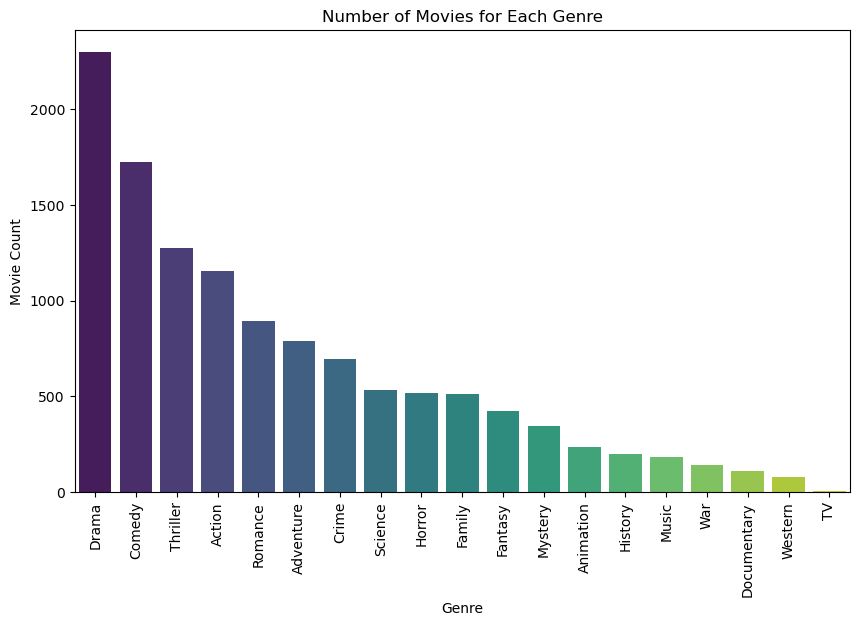

In [28]:
# Creating a visualisation of the number of movies for each genre.

data = {'Genre': all_genres, 'Movie_Count': [df[df['genres'].str.contains(genre, case=False, na=False)].shape[0] for genre in all_genres]}
genre_counts_df = pd.DataFrame(data)

# Making sure that

genre_counts_df = genre_counts_df.sort_values(by='Movie_Count', ascending=False)

# Seaborn plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts_df,
            x='Genre',
            y='Movie_Count',
            palette='viridis'
           )

plt.xlabel('Genre')
plt.ylabel('Movie Count')

plt.xticks(rotation=90,
           ha='center',
           fontsize=10)

plt.title('Number of Movies for Each Genre')
plt.show()

This graph shows that out of all of the movies in the dataset, Drama is the most common, followed by Comedy, with TV being the lowest movie count, with significantly lower than Drama.

In [29]:
#Creating a profit column

df['profit'] = df['revenue'] - df['budget']
df.profit;

In [30]:
#Replacing the 0 values with NaN, to not interfere with the data.

df['budget'].replace(0, np.nan, inplace=True)
df['revenue'].replace(0, np.nan, inplace=True)
df['profit'].replace(0, np.nan, inplace=True)

In [31]:
# Creating datasets for more genre analysis, against popularity, revenue and budget

data = {'Genre': all_genres,
        'Movie_Count': [df[df['genres'].str.contains(genre, case=False, na=False)].shape[0] for genre in all_genres],
        'Popularity': [df[df['genres'].str.contains(genre, case=False, na=False)]['popularity'].sum() for genre in all_genres],
        'Revenue': [df[df['genres'].str.contains(genre, case=False, na=False)]['revenue'].sum() for genre in all_genres],
        'Budget': [df[df['genres'].str.contains(genre, case=False, na=False)]['budget'].sum() for genre in all_genres],
        'Profit': [df[df['genres'].str.contains(genre, case=False, na=False)]['profit'].sum() for genre in all_genres]
       }

genre_counts_df = pd.DataFrame(data)

# Grouping by popularity
grouped_by_popularity = genre_counts_df.groupby('Genre')['Popularity'].sum().reset_index()

# Grouping by revenue
grouped_by_revenue = genre_counts_df.groupby('Genre')['Revenue'].sum().reset_index()

#Grouping by budget
grouped_by_budget = genre_counts_df.groupby('Genre')['Budget'].sum().reset_index()

#Grouping by Profit
grouped_by_profit = genre_counts_df.groupby('Genre')['Profit'].sum().reset_index()

In [32]:
#Table to show popularity, revenue and budget against all genres.

genre_counts_df;

Now, we're interested to see which genre produces the highest revenue.

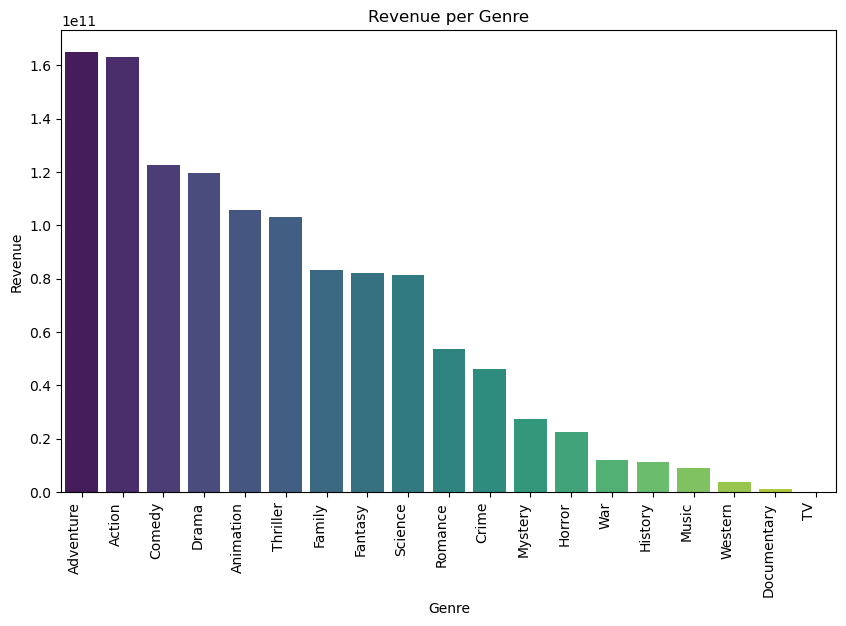

In [33]:
#Choosing the Dataframe

grouped_by_revenue = grouped_by_revenue.sort_values(by='Revenue', ascending=False)

# Create the barplot

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_by_revenue,
            x='Genre',
            y='Revenue',
            
            palette='viridis'
            )

plt.xticks(rotation=90,
           horizontalalignment='right',
           fontweight='light',
           fontsize=10)

plt.title('Revenue per Genre')

plt.show()

Although Drama has the most number of movies in the dataset, Adventure is the genre that returns the most revenue. However, who has a higher budget?

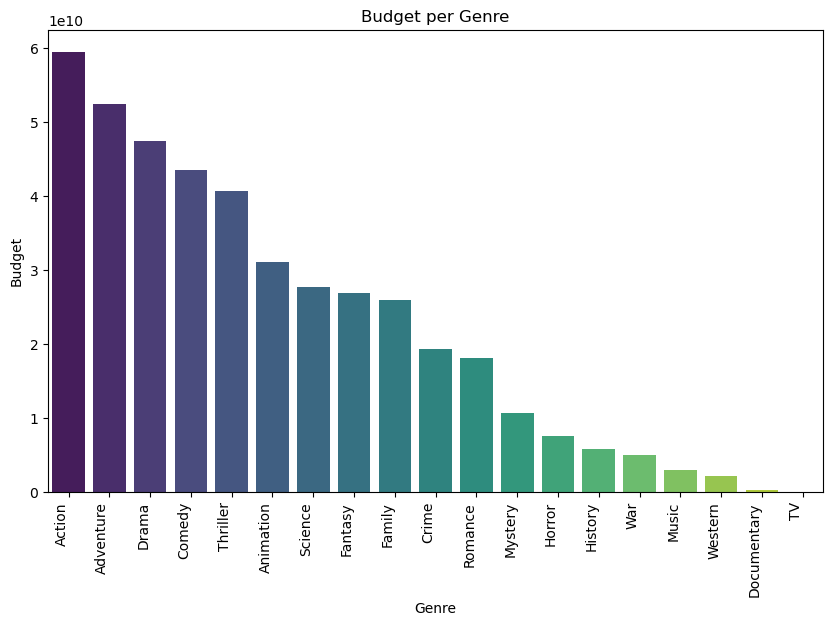

In [35]:
#Choosing the dataframe
grouped_by_budget = grouped_by_budget.sort_values(by='Budget', ascending=False)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_by_budget,
            x='Genre',
            y='Budget',
            palette='viridis',
            )

plt.xticks(rotation=90,
           horizontalalignment='right',
           fontweight='light',
           fontsize=10)

plt.title('Budget per Genre')

plt.show()

Action and Adventure have the highest revenue, we can make a strong suggestion that this due to those genres having the biggest budgets.

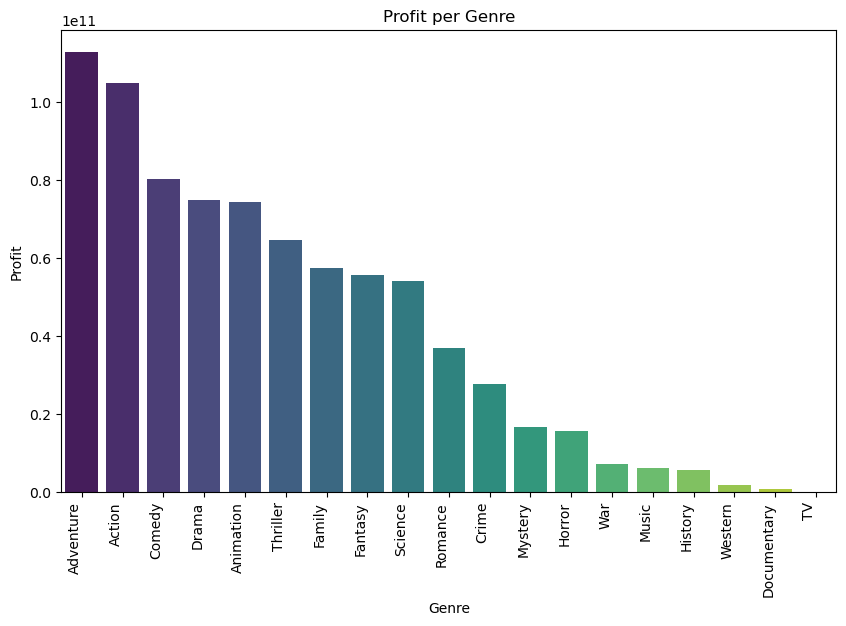

In [36]:
#Choosing the dataframe
grouped_by_profit = grouped_by_profit.sort_values(by='Profit', ascending=False)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_by_profit,
            x='Genre',
            y='Profit',
            palette='viridis'
            )

plt.xticks(rotation=90,
           horizontalalignment='right',
           fontweight='light',
           fontsize=10)

plt.title('Profit per Genre')

plt.show()

Action and Adventure have the highest budgets out of all the genres but they also produce the highest revenue. The films have a lot of investments but also return a revenue. They also make the biggest profit for all of the genres. The same can be said for Documentary and TV. They have the smallest budgest, return the smallest revenue, generating the smallest profits.

###  Key Insight- Budget vs. Revenue

How much does the budget truly affect the revenue produced by the film?

In [37]:
#Defining Profitability

df['profitability'] = pd.cut(
    df['revenue'] - df['budget'],
    bins=[float('-inf'), 0, float('inf')],
    labels=['Not Profitable', 'Profitable']
)

# DataFrame with the new 'profitability' column
df[['title', 'budget', 'revenue', 'profitability', 'genres']]

,title,budget,revenue,profitability,genres
0,Avatar,237000000.0,2.787965e+09,Profitable,"Action,Adventure,Fantasy,Science Fiction"
1,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,Profitable,"Adventure,Fantasy,Action"
2,Spectre,245000000.0,8.806746e+08,Profitable,"Action,Adventure,Crime"
3,The Dark Knight Rises,250000000.0,1.084939e+09,Profitable,"Action,Crime,Drama,Thriller"
4,John Carter,260000000.0,2.841391e+08,Profitable,"Action,Adventure,Science Fiction"
...,...,...,...,...,...
4798,El Mariachi,220000.0,2.040920e+06,Profitable,"Action,Crime,Thriller"
4799,Newlyweds,9000.0,NaN,NaN,"Comedy,Romance"
4800,"Signed, Sealed, Delivered",NaN,NaN,NaN,"Comedy,Drama,Romance,TV Movie"
4801,Shanghai Calling,NaN,NaN,NaN,


Correlation coefficient between revenue and budget: 0.7053993306781375


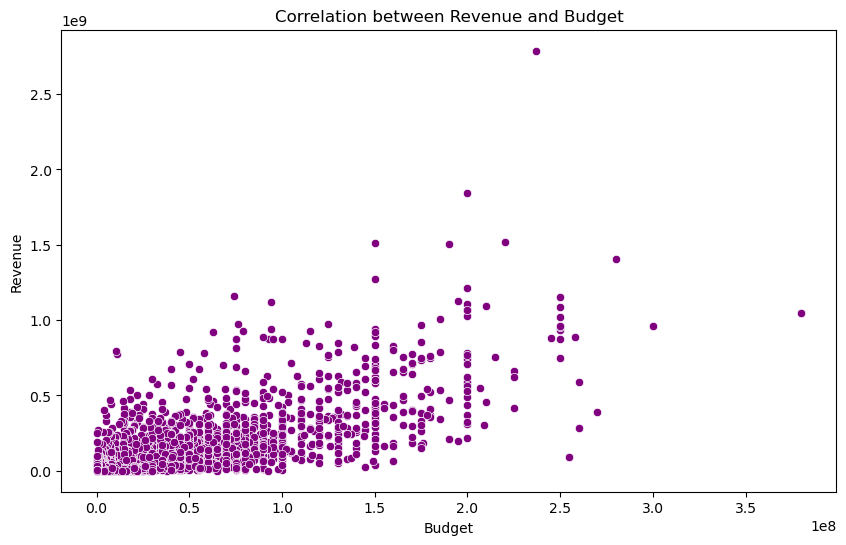

In [38]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='budget',
                y='revenue',
                color = 'purple')

plt.title('Correlation between Revenue and Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')

# Calculate the correlation coefficient
correlation_coefficient = df['budget'].corr(df['revenue'])
print(f'Correlation coefficient between revenue and budget: {correlation_coefficient}')

plt.show()

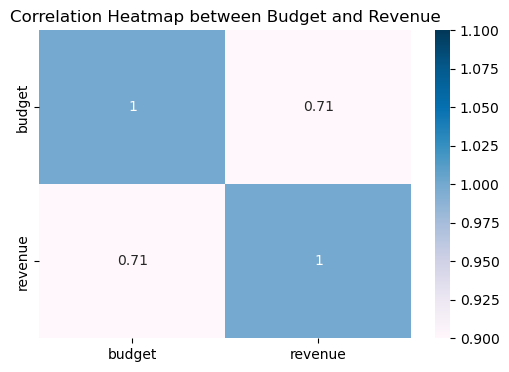

Correlation coefficient between revenue and budget: 0.7053993306781375


In [39]:
subset_df = df[['budget', 'revenue']]

# Compute the correlation matrix for the subset
correlation_matrix = subset_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='PuBu',
            vmin=1,
            vmax=1)

plt.title('Correlation Heatmap between Budget and Revenue')
plt.show()

correlation_coefficient = df['budget'].corr(df['revenue'])
print(f'Correlation coefficient between revenue and budget: {correlation_coefficient}')

#Reference: Medium Blog Post by Lisa Carpenter


In [40]:
#Categorising films into 'Profitable' and 'Not Profitable'
profitability_counts = df[df['status'] == 'Released']['profitability'].value_counts()

print("Profitable films:", profitability_counts.get('Profitable', 0))
print("Not Profitable films:", profitability_counts.get('Not Profitable', 0))

Profitable films: 2438
Not Profitable films: 790


<function matplotlib.pyplot.show(close=None, block=None)>

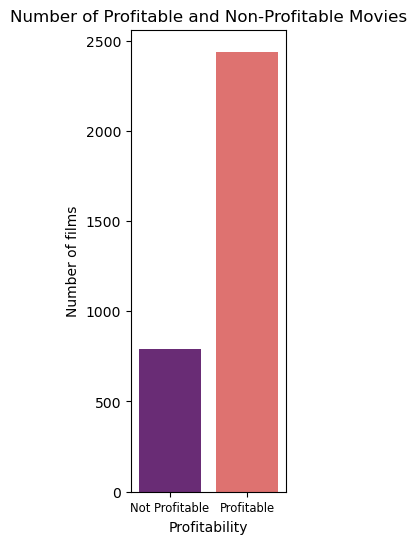

In [42]:
# Filter the DataFrame for 'Released' status
released_df = df[df['status'] == 'Released']

# Create the barplot
plt.figure(figsize=(2, 6))
sns.countplot(data=released_df,
              x='profitability',
              palette='magma',
             linewidth=1)

plt.xticks(rotation=0,
           horizontalalignment='right',
           fontweight='light',
           ha='center',
           fontsize='small',
        )

plt.xlabel('Profitability')
plt.ylabel('Number of films')

plt.title('Number of Profitable and Non-Profitable Movies')

plt.show

In [43]:
#Sorting films by budget to know the range

films_sorted = df.sort_values(by='budget', ascending=False)
films_sorted;

In [44]:
# Define your budget_range function

def budget_range(budget):
    if budget < 50000000:
        return '$0-$50,000,000'
    elif budget < 100000000:
        return '$50,000,000-$100,000,000'
    elif budget < 150000000:
        return '$100,000,000-$150,000,000'
    elif budget < 200000000:
        return '$150,000,000-$200,000,000'
    elif budget < 250000000:
        return '$200,000,000-$250,000,000'
    elif budget < 300000000:
        return '$250,000,000-$300,000,000'
    elif budget < 350000000:
        return '$300,000,000-$350,000,000'
    elif budget < 400000000:
        return '$350,000,000-$400,000,000'

# Apply the budget_range function to the 'budget' column
df['budget_range'] = df['budget'].apply(budget_range)

# Display the relevant columns
df[['budget_range', 'revenue']];


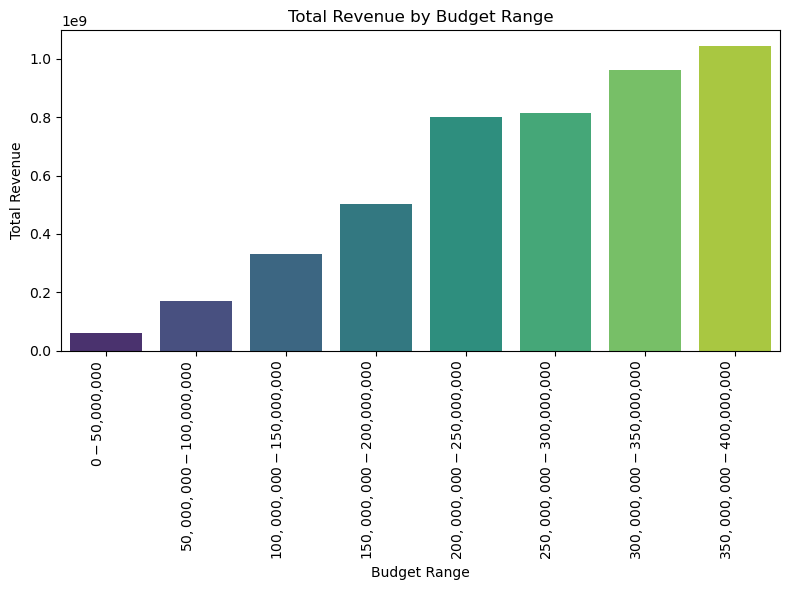

In [46]:
#The budget range, grouped by the revenue
budget_revenue = df.groupby('budget_range')['revenue'].mean().reset_index()
budget_revenue_sorted = budget_revenue.sort_values(by='revenue', ascending=True)

#Odering the bins

custom_order = ['$0-$50,000,000', '$50,000,000-$100,000,000', '$100,000,000-$150,000,000',
                '$150,000,000-$200,000,000', '$200,000,000-$250,000,000',
                '$250,000,000-$300,000,000', '$300,000,000-$350,000,000', '$350,000,000-$400,000,000']

budget_revenue['budget_range'] = pd.Categorical(budget_revenue['budget_range'], categories=custom_order, ordered=True)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=budget_revenue,
            x='budget_range',
            y='revenue',
            palette ='viridis'
            )

plt.title('Total Revenue by Budget Range')
plt.xlabel('Budget Range')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

The key insight here is more the more investment in the budget, the more profit and revenue is returned. Successful movies are movies we can assume hire professional actors, CGI or use cool effects that people find entertaining.

#### Analysis of Production Companies

Production comapnies would have an effect on the success of a movie. They determine the budget, which we have seen will have an effect on the revnue and profit for the movie. Let's take a closer look at the more successful production companies.

In [47]:
# Group by production companies and calculate total revenue
production_company_revenue = df.groupby('production_companies')['revenue'].sum().reset_index()

# Sort the table by total revenue in descending order
production_company_revenue_sorted = production_company_revenue.sort_values(by='revenue', ascending=False)

# Print the result
production_company_revenue_sorted.head(10)

,production_companies,revenue
3552,"Walt Disney Pictures,Pixar Animation Studios",6.742125e+09
808,DreamWorks Animation,5.678788e+09
2102,Paramount Pictures,5.208166e+09
1700,Marvel Studios,5.123094e+09
271,"Blue Sky Studios,Twentieth Century Fox Animation",4.185053e+09
452,Columbia Pictures,2.930038e+09
3268,"Universal Pictures,Illumination Entertainment",2.854961e+09
3565,"Walt Disney Pictures,Walt Disney Animation Stu...",2.799625e+09
1392,"Ingenious Film Partners,Twentieth Century Fox ...",2.787965e+09
3566,"Walt Disney Pictures,Walt Disney Feature Anima...",2.718054e+09


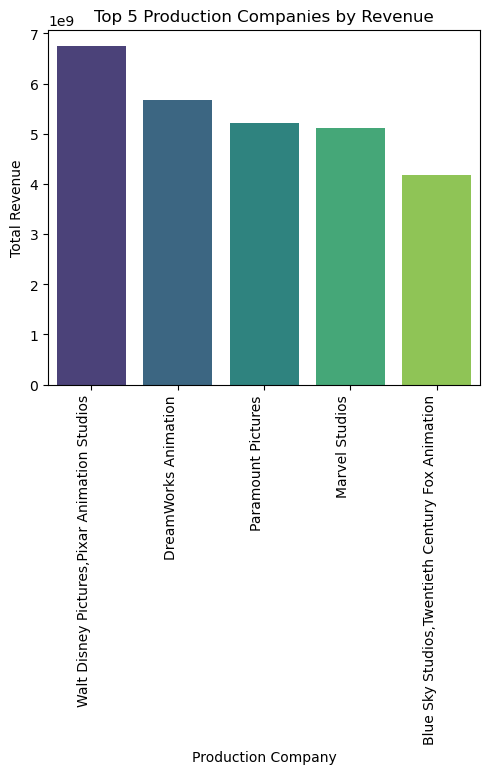

In [48]:
#Sorting the production company by revenue.
production_company_revenue_sorted = production_company_revenue.sort_values(by='revenue', ascending=False)
top_5_production_companies = production_company_revenue_sorted.head(5)

# Plot the bar chart
plt.figure(figsize=(5, 8))
sns.barplot(data=top_5_production_companies,
            x='production_companies',
            y='revenue',
            palette='viridis')

plt.xlabel('Production Company')
plt.ylabel('Total Revenue')
plt.title('Top 5 Production Companies by Revenue')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### Revenue by Year

In [49]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year and create a new column 'release_year'
df['release_year'] = df['release_date'].dt.year

In [50]:
df.release_year.sort_values();

In [51]:
def diff_decade(year):
    if year < 1920:
        return '1910s'
    elif year < 1930:
        return '1920s'
    elif year < 1940:
        return '1930s'
    elif year < 1950:
        return '1940s'
    elif year < 1960:
        return '1950s'
    elif year < 1970:
        return '1960s'
    elif year < 1980:
        return '1970s'
    elif year < 1990:
        return '1980s'
    elif year < 2000:
        return '1990s'
    elif year < 2010:
        return '2000s'
    elif year < 2020:
        return '2010s'

# Assuming your dataframe is named 'df'
# Apply the diff_decade function to the 'release_year' column
df['release_year'] = df['release_year'].apply(diff_decade)

#Reference: Collegue: Ben

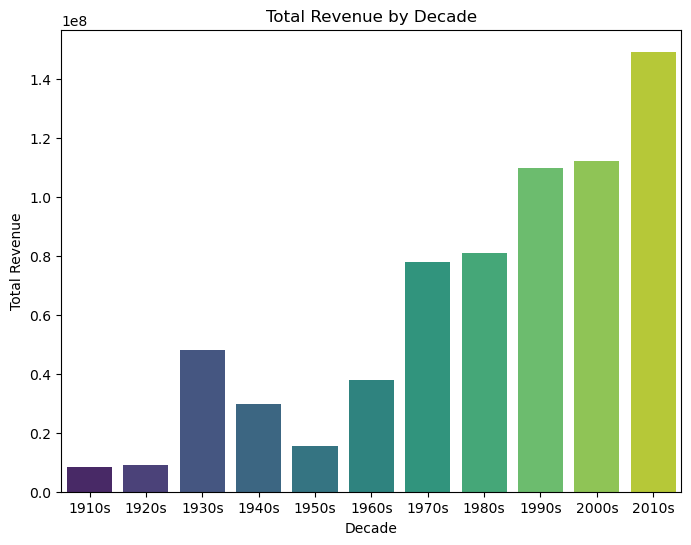

In [52]:
revenue_by_decade = df.groupby('release_year')['revenue'].mean().reset_index()

# Plot the bar graph using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=revenue_by_decade,
            x='release_year',
            y='revenue',
           palette = 'viridis')
plt.title('Total Revenue by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Revenue')
plt.show()

This further proves our key-insight because as the years go on, technology develops to include more cinematic experiences, which will cause the budget to increase but as the graph shows return a higher revenue.

### Zoom-in into Movies

In [53]:
df_released = df[df['status'] == 'Released']

# Sort the DataFrame by 'revenue' in descending order
df_sorted = df_released.sort_values(by='revenue', ascending=False)

# Display the sorted DataFrame
df_sorted.head(1);

In [54]:
avatar = df[df['title'] == 'Avatar']
avatar;

In [55]:
newlyweds = df[df['title']== 'Newlyweds']
newlyweds;

I've chosen to delve into the details of two movies from the table—both having the distinction of being released but differing significantly in their success outcomes.

Firstly, let's explore the data for the movie "Avatar." It was released on 10 December 2009. It falls under the genres  of Action, Adventure, Fantasy, and Science Fiction. Action and Adventure was the most profitable genres as we disovered. Its produced by Ingenious Film Partners and Twentieth Century Fox, "Avatar" boasts a remarkable popularity score of 150.43. Twentieth Century Fox is one of the most successful production companies worldwide and Avatar is their highest-grossing film of all time. The film garnered an impressive revenue of $2,787,965,087.

It has a solid vote average of 7.2 from 11,800 votes. It proved to one of most successful films of all time with a profit of $2,550,965,000.

On the flip side, a film called "Newleyweds," a comedy-romance released on 26 December 2011. It has popularity score 0.642522. Surprisingly, the budget for this movie is $9000, a huge contrast to the blockbuster standards. Despite this, it maintains a vote average of 5.9, however it is important to note that only 5 votes contributed to its evaluation. It wasn't no profitable, as it didn't make a revenue.

In comparing these two films, "Avatar" stands out as a colossal success in terms of revenue and popularity, reflecting its widespread acclaim in various genres. Meanwhile, "Newlyweds," while lacking in financial returns, manages to hold its own with a decent vote average, showcasing a different niche within the cinematic landscape. This may show that a film that has a larger budget and represents multiple genres will generate a larger revenue.





